## 项目案例1: 使用 Logistic 回归在简单数据集上的分类
完整代码地址: https://github.com/apachecn/AiLearning/blob/master/src/py3.x/ml/5.Logistic/logistic.py

In [35]:
# 解析数据
def loadDataSet(file_name):
    '''
    Desc: 
        加载并解析数据
    Args:
        file_name -- 要解析的文件路径
    Returns:
        dataMat -- 原始数据的特征
        labelMat -- 原始数据的标签，也就是每条样本对应的类别。即目标向量
    '''
    # dataMat为原始数据， labelMat为原始数据的标签
    dataMat = []
    labelMat = []
    fr = open(file_name)
    for line in fr.readlines():
        lineArr = line.strip().split()
        # 为了方便计算，我们将 X0 的值设为 1.0 ，也就是在每一行的开头添加一个 1.0 作为 X0
        dataMat.append([1.0, float(lineArr[0]), float(lineArr[1])])
        labelMat.append(int(lineArr[2]))
    return dataMat, labelMat

In [36]:
data_arr, class_labels = loadDataSet(r'./TestSet.txt')
print(class_labels)
data_arr

[0, 1, 0, 0, 0]


[[1.0, -0.017612, 14.053064],
 [1.0, -1.395634, 4.662541],
 [1.0, -0.752157, 6.53862],
 [1.0, -1.322371, 7.152853],
 [1.0, 0.423363, 11.054677]]

In [45]:
# sigmoid阶跃函数
import numpy as np
def sigmoid(inX):
    # return 1.0 / (1 + exp(-inX))

    # Tanh是Sigmoid的变形，与 sigmoid 不同的是，tanh 是0均值的。因此，实际应用中，tanh 会比 sigmoid 更好。
    return 2 * 1.0/(1+np.exp(-2*inX)) - 1

In [46]:
a = sigmoid(0)
a

0.0

In [53]:
# Logistic 回归梯度上升优化算法
import numpy as np

# 正常的处理方案
# 两个参数：第一个参数==> dataMatIn 是一个2维NumPy数组，每列分别代表每个不同的特征，每行则代表每个训练样本。
# 第二个参数==> classLabels 是类别标签，它是一个 1*100 的行向量。为了便于矩阵计算，需要将该行向量转换为列向量，做法是将原向量转置，再将它赋值给labelMat。
def gradAscent(dataMatIn, classLabels):
    # 转化为矩阵[[1,1,2],[1,1,2]....]
    dataMatrix = np.mat(dataMatIn)             # 转换为 NumPy 矩阵
    # 转化为矩阵[[0,1,0,1,0,1.....]]，并转制[[0],[1],[0].....]
    # transpose() 行列转置函数
    # 将行向量转化为列向量   =>  矩阵的转置
    labelMat = np.mat(classLabels).transpose() # 首先将数组转换为 NumPy 矩阵，然后再将行向量转置为列向量
    # m->数据量，样本数 n->特征数
    m,n = np.shape(dataMatrix)
    # print m, n, '__'*10, shape(dataMatrix.transpose()), '__'*100
    # alpha代表向目标移动的步长
    alpha = 0.001
    # 迭代次数
    maxCycles = 500
    # 生成一个长度和特征数相同的矩阵，此处n为3 -> [[1],[1],[1]]
    # weights 代表回归系数， 此处的 ones((n,1)) 创建一个长度和特征数相同的矩阵，其中的数全部都是 1
    weights = np.ones((n,1))
    for k in range(maxCycles):              #heavy on matrix operations
        # m*3 的矩阵 * 3*1 的矩阵 ＝ m*1的矩阵
        # 那么乘上矩阵的意义，就代表：通过公式得到的理论值
        # 参考地址： 矩阵乘法的本质是什么？ https://www.zhihu.com/question/21351965/answer/31050145
        # print 'dataMatrix====', dataMatrix 
        # print 'weights====', weights
        # n*3   *  3*1  = n*1
        h = sigmoid(dataMatrix*weights)     # 矩阵乘法
        # print 'hhhhhhh====', h
        # labelMat是实际值
        error = (labelMat - h)              # 向量相减
        # 0.001* (3*m)*(m*1) 表示在每一个列上的一个误差情况，最后得出 x1,x2,xn的系数的偏移量
        weights = weights + alpha * dataMatrix.transpose() * error # 矩阵乘法，最后得到回归系数
    return np.array(weights)

In [54]:
# 画出数据集和 Logistic 回归最佳拟合直线的函数

import matplotlib.pyplot as plt

def plotBestFit(dataArr, labelMat, weights):
    '''
        Desc:
            将我们得到的数据可视化展示出来
        Args:
            dataArr:样本数据的特征
            labelMat:样本数据的类别标签，即目标变量
            weights:回归系数
        Returns:
            None
    '''

    n = shape(dataArr)[0]
    xcord1 = []; ycord1 = []
    xcord2 = []; ycord2 = []
    for i in range(n):
        if int(labelMat[i])== 1:
            xcord1.append(dataArr[i,1]); ycord1.append(dataArr[i,2])
        else:
            xcord2.append(dataArr[i,1]); ycord2.append(dataArr[i,2])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1, ycord1, s=30, c='red', marker='s')
    ax.scatter(xcord2, ycord2, s=30, c='green')
    x = arange(-3.0, 3.0, 0.1)
    """
    y的由来，卧槽，是不是没看懂？
    首先理论上是这个样子的。
    dataMat.append([1.0, float(lineArr[0]), float(lineArr[1])])
    w0*x0+w1*x1+w2*x2=f(x)
    x0最开始就设置为1叻， x2就是我们画图的y值，而f(x)被我们磨合误差给算到w0,w1,w2身上去了
    所以： w0+w1*x+w2*y=0 => y = (-w0-w1*x)/w2   
    """
    y = (-weights[0]-weights[1]*x)/weights[2]
    ax.plot(x, y)
    plt.xlabel('X'); plt.ylabel('Y')
    plt.show()

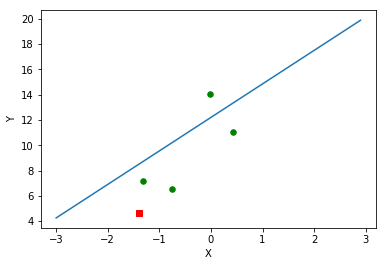

In [61]:
# 1.收集并准备数据
dataMat, labelMat = loadDataSet(r'./TestSet.txt')
dataMat
# print dataMat, '---\n', labelMat
# 2.训练模型，  f(x)=a1*x1+b2*x2+..+nn*xn中 (a1,b2, .., nn).T的矩阵值
# 因为数组没有是复制n份， array的乘法就是乘法
dataArr = np.array(dataMat)
# dataArr
# print dataArr
weights = gradAscent(dataArr, labelMat)
# weights = stocGradAscent0(dataArr, labelMat)
# weights = stocGradAscent1(dataArr, labelMat)
# print '*'*30, weights
weights

# 数据可视化
plotBestFit(dataArr, labelMat, weights)

In [64]:
# test

dataMatIn, classLabels = loadDataSet(r'./TestSet.txt')

# 转化为矩阵[[1,1,2],[1,1,2]....]
dataMatrix = np.mat(dataMatIn)             # 转换为 NumPy 矩阵
# 转化为矩阵[[0,1,0,1,0,1.....]]，并转制[[0],[1],[0].....]
# transpose() 行列转置函数
# 将行向量转化为列向量   =>  矩阵的转置
labelMat = np.mat(classLabels).transpose() # 首先将数组转换为 NumPy 矩阵，然后再将行向量转置为列向量
# m->数据量，样本数 n->特征数
m,n = np.shape(dataMatrix)
# print m, n, '__'*10, shape(dataMatrix.transpose()), '__'*100
# alpha代表向目标移动的步长
alpha = 0.001
# 迭代次数
maxCycles = 500
# 生成一个长度和特征数相同的矩阵，此处n为3 -> [[1],[1],[1]]
# weights 代表回归系数， 此处的 ones((n,1)) 创建一个长度和特征数相同的矩阵，其中的数全部都是 1
weights = np.ones((n,1))
for k in range(maxCycles):              #heavy on matrix operations
    # m*3 的矩阵 * 3*1 的矩阵 ＝ m*1的矩阵
    # 那么乘上矩阵的意义，就代表：通过公式得到的理论值
    # 参考地址： 矩阵乘法的本质是什么？ https://www.zhihu.com/question/21351965/answer/31050145
    # print 'dataMatrix====', dataMatrix 
    # print 'weights====', weights
    # n*3   *  3*1  = n*1
    h = sigmoid(dataMatrix*weights)     # 矩阵乘法
    # print 'hhhhhhh====', h
    # labelMat是实际值
    error = (labelMat - h)              # 向量相减
    # 0.001* (3*m)*(m*1) 表示在每一个列上的一个误差情况，最后得出 x1,x2,xn的系数的偏移量
    weights = weights + alpha * dataMatrix.transpose() * error # 矩阵乘法，最后得到回归系数

In [65]:
dataMatIn, classLabels = loadDataSet(r'./TestSet.txt')
dataMatrix = np.mat(dataMatIn)             # 转换为 NumPy 矩阵
dataMatrix

matrix([[ 1.      , -0.017612, 14.053064],
        [ 1.      , -1.395634,  4.662541],
        [ 1.      , -0.752157,  6.53862 ],
        [ 1.      , -1.322371,  7.152853],
        [ 1.      ,  0.423363, 11.054677]])

In [68]:
labelMat = np.mat(classLabels).transpose() # 首先将数组转换为 NumPy 矩阵，然后再将行向量转置为列向量
labelMat

matrix([[0],
        [1],
        [0],
        [0],
        [0]])

In [76]:
m,n = np.shape(dataMatrix)

alpha = 0.001

maxCycles = 500
weights = np.ones((n,1))
print(dataMatrix)
print(weights)
tmp = dataMatrix*weights
print(tmp)

# h = sigmoid(dataMatrix*weights)
# print(h)
# error = (labelMat - h)
# print(error)
# weights = weights + alpha * dataMatrix.transpose() * error
# weights

for k in range(maxCycles):
    h = sigmoid(dataMatrix*weights)
    error = (labelMat - h)
    weights = weights + alpha * dataMatrix.transpose() * error
weights

[[ 1.       -0.017612 14.053064]
 [ 1.       -1.395634  4.662541]
 [ 1.       -0.752157  6.53862 ]
 [ 1.       -1.322371  7.152853]
 [ 1.        0.423363 11.054677]]
[[1.]
 [1.]
 [1.]]
[[15.035452]
 [ 4.266907]
 [ 6.786463]
 [ 6.830482]
 [12.47804 ]]


matrix([[ 1.16015304],
        [ 0.25188172],
        [-0.09510848]])